<a href="https://colab.research.google.com/github/ibudeX/Mall-Customer-Clustering-and-Segmentation/blob/main/Clustering_Customer_Segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/customer-segmentation-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

In [ ]:
os.listdir(path)

['Online Retail.xlsx']

In [ ]:
data = pd.read_excel(os.path.join(path, 'Online Retail.xlsx'))


In [ ]:
data = data.sample(1000)

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
214817,555631,22197,SMALL POPCORN HOLDER,12,2011-06-06 12:06:00,0.85,18118.0,United Kingdom
249176,558888,23237,SET OF 4 KNICK KNACK TINS LEAVES,3,2011-07-04 15:29:00,4.15,14056.0,United Kingdom
240876,558118,22961,JAM MAKING SET PRINTED,1,2011-06-27 09:11:00,3.29,NaN,United Kingdom
249831,558920,23240,SET OF 4 KNICK KNACK TINS DOILEY,6,2011-07-05 09:57:00,4.15,15078.0,United Kingdom
411235,572209,23557,LANDMARK FRAME BAKER STREET,300,2011-10-21 12:08:00,10.95,18102.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 214817 to 528932
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    1000 non-null   object        
 1   StockCode    1000 non-null   object        
 2   Description  997 non-null    object        
 3   Quantity     1000 non-null   int64         
 4   InvoiceDate  1000 non-null   datetime64[ns]
 5   UnitPrice    1000 non-null   float64       
 6   CustomerID   767 non-null    float64       
 7   Country      1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 70.3+ KB


In [ ]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,1000.0,9.432,-200.0,1.0,3.0,12.0,300.0,23.033365
InvoiceDate,1000,2011-07-11 07:26:59.880000,2010-12-01 09:32:00,2011-04-04 13:17:15,2011-07-28 01:54:30,2011-10-21 12:55:30,2011-12-09 10:26:00,NaN
UnitPrice,1000.0,3.20798,0.0,1.06,1.95,4.13,79.67,4.105118
CustomerID,767.0,15303.146023,12359.0,13887.0,15280.0,16804.5,18283.0,1717.457715


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
numerical_col=[col for col in data.columns if data[col].dtype!='object']
categorical_col=[col for col in data.columns if data[col].dtype=='object']

In [ ]:
print(numerical_col)
print(categorical_col)

['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']
['InvoiceNo', 'StockCode', 'Description', 'Country']


In [ ]:
data['Country'].unique()

array(['United Kingdom', 'Germany', 'France', 'Switzerland', 'Norway',
       'EIRE', 'Australia', 'Spain', 'Portugal', 'Netherlands', 'Denmark',
       'Italy', 'Singapore', 'Channel Islands', 'Belgium', 'Cyprus',
       'Finland', 'European Community'], dtype=object)

In [ ]:
data['Description'].nunique()

731

In [ ]:
data.dropna(subset=['Description'], inplace=True)

In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,230
Country,0


In [ ]:
data1 = data[['Description', 'Quantity', 'UnitPrice', 'Country']]

In [ ]:
numerical_col=[col for col in data1.columns if data1[col].dtype!='object']
categorical_col=[col for col in data1.columns if data1[col].dtype=='object']

In [ ]:
print (numerical_col)
print (categorical_col)

['Quantity', 'UnitPrice']
['Description', 'Country']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

catagorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

In [ ]:
column_transformer = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_col),
    ('categorical', catagorical_pipeline, categorical_col)
])

In [ ]:
dataC=column_transformer.fit_transform(data1)

# Convert the sparse matrix to a DataFrame to use head()
dataC_df = pd.DataFrame(dataC.toarray())
print(dataC_df.head())

         0         1    2    3    4    5    6    7    8    9    ...  741  742  \
0   0.109228 -0.576705  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  -0.281564  0.227105  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  -0.368406  0.017627  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  -0.151300  0.227105  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  12.614570  1.883439  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

   743  744  745  746  747  748  749  750  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[5 rows x 751 columns]


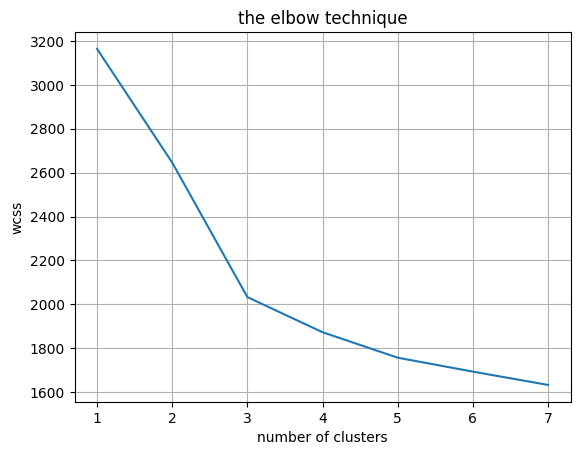

In [ ]:
# Convert 'Description' and 'Country' columns to strings before applying ColumnTransformer
#data1['Description'] = data1['Description'].astype(str)
#data1['Country'] = data1['Country'].astype(str)

# elbow technique on the data
wcss=[]
for i in range(1,8):
  kmeans=KMeans(n_clusters=i, random_state=42, init='k-means++')
  kmeans.fit(dataC_df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss)
plt.title('the elbow technique')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.grid()
plt.show()

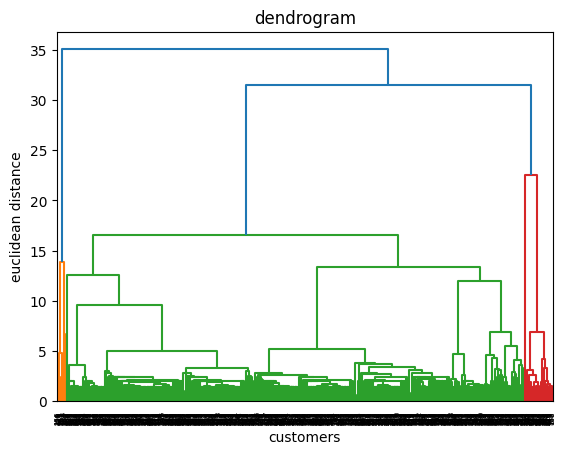

In [ ]:
#dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.metrics import pairwise_distances

# Convert the sparse matrix to a dense array and calculate pairwise distances
#dense_data = column_transformer.fit_transform(data1).toarray()
#distance_matrix = pairwise_distances(dense_data)

dendrogram=sch.dendrogram(sch.linkage(dataC_df, method='ward'))
plt.title('dendrogram')
plt.xlabel('customers')
plt.ylabel('euclidean distance')
plt.show()

In [ ]:
kmean= KMeans(n_clusters=4, random_state=42, init="k-means++")
kmean.fit(dataC_df)

KMeans(n_clusters=4, random_state=42)

In [ ]:
y_kmeans=kmean.predict(dataC_df)

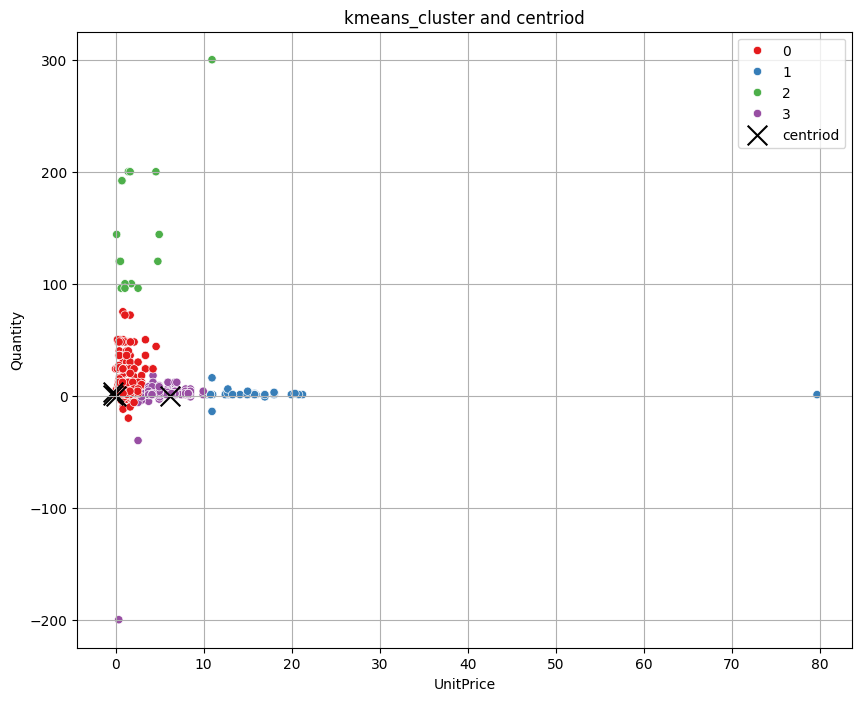

1872.8825883377704


In [ ]:
#plot clustera and centrods with seaborn
plt.figure(figsize=(10,8))
sns.scatterplot(data=data1, x='UnitPrice', y="Quantity", hue=y_kmeans, palette='Set1')
centriod = kmean.cluster_centers_
plt.scatter(centriod[:, 0], centriod[:, 1], c='black', s=200, marker="x",label="centriod")
plt.legend()
plt.title('kmeans_cluster and centriod')
plt.grid()
plt.show()

print(kmean.inertia_)

In [ ]:
#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
AC=AgglomerativeClustering(n_clusters=4, linkage='ward')
y_AC=AC.fit_predict(dataC_df)

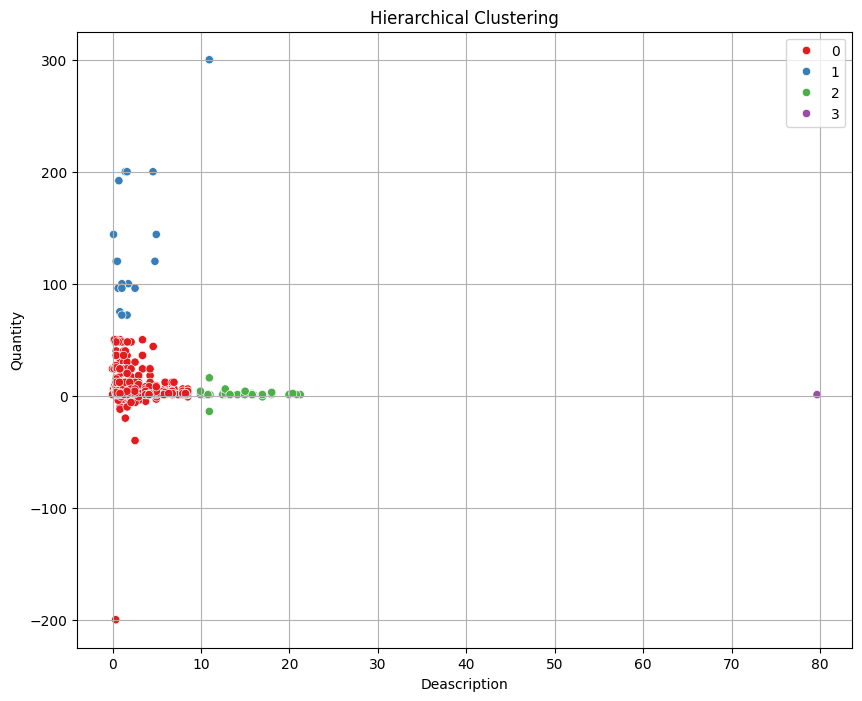

In [ ]:
#plot with seaborn
plt.figure(figsize=(10,8))
sns.scatterplot(data=data1, x="UnitPrice", y="Quantity", hue=y_AC, palette='Set1')
plt.title('Hierarchical Clustering')
plt.xlabel('Deascription')
plt.ylabel('Quantity')
plt.grid()
plt.show()

In [ ]:
#DESCAN
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1.5, min_samples=5)
y_dbscan=dbscan.fit_predict(dataC_df)

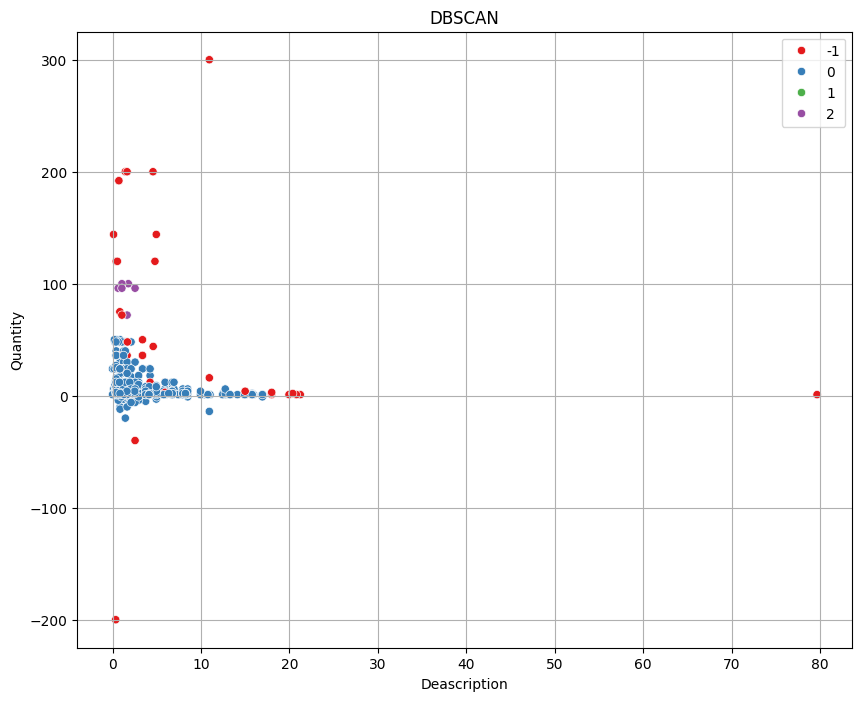

In [ ]:
#plot
plt.figure(figsize=(10,8))
sns.scatterplot(data=data1, x="UnitPrice", y="Quantity", hue=y_dbscan, palette='Set1')
plt.title('DBSCAN')
plt.xlabel('Deascription')
plt.ylabel('Quantity')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate metrics for each model
kmeans_silhouette = silhouette_score(dataC_df, y_kmeans)
kmeans_davies_bouldin = davies_bouldin_score(dataC_df, y_kmeans)
kmeans_calinski_harabasz = calinski_harabasz_score(dataC_df, y_kmeans)

ac_silhouette = silhouette_score(dataC_df, y_AC)
ac_davies_bouldin = davies_bouldin_score(dataC_df, y_AC)
ac_calinski_harabasz = calinski_harabasz_score(dataC_df, y_AC)

dbscan_silhouette = silhouette_score(dataC_df, y_dbscan)
dbscan_davies_bouldin = davies_bouldin_score(dataC_df, y_dbscan)
dbscan_calinski_harabasz = calinski_harabasz_score(dataC_df, y_dbscan)

# Print the results
print("Metric\t\tKMeans\t\tAgglomerative\tDBSCAN")
print("-" * 50)
print(f"Silhouette\t{kmeans_silhouette:.4f}\t\t{ac_silhouette:.4f}\t\t{dbscan_silhouette:.4f}")
print(f"Davies-Bouldin\t{kmeans_davies_bouldin:.4f}\t\t{ac_davies_bouldin:.4f}\t\t{dbscan_davies_bouldin:.4f}")
print(f"Calinski-Harabasz\t{kmeans_calinski_harabasz:.4f}\t{ac_calinski_harabasz:.4f}\t{dbscan_calinski_harabasz:.4f}")

Metric		KMeans		Agglomerative	DBSCAN
--------------------------------------------------
Silhouette	0.1273		0.4394		0.1318
Davies-Bouldin	1.6340		0.6499		2.1256
Calinski-Harabasz	228.0957	251.0396	37.2210


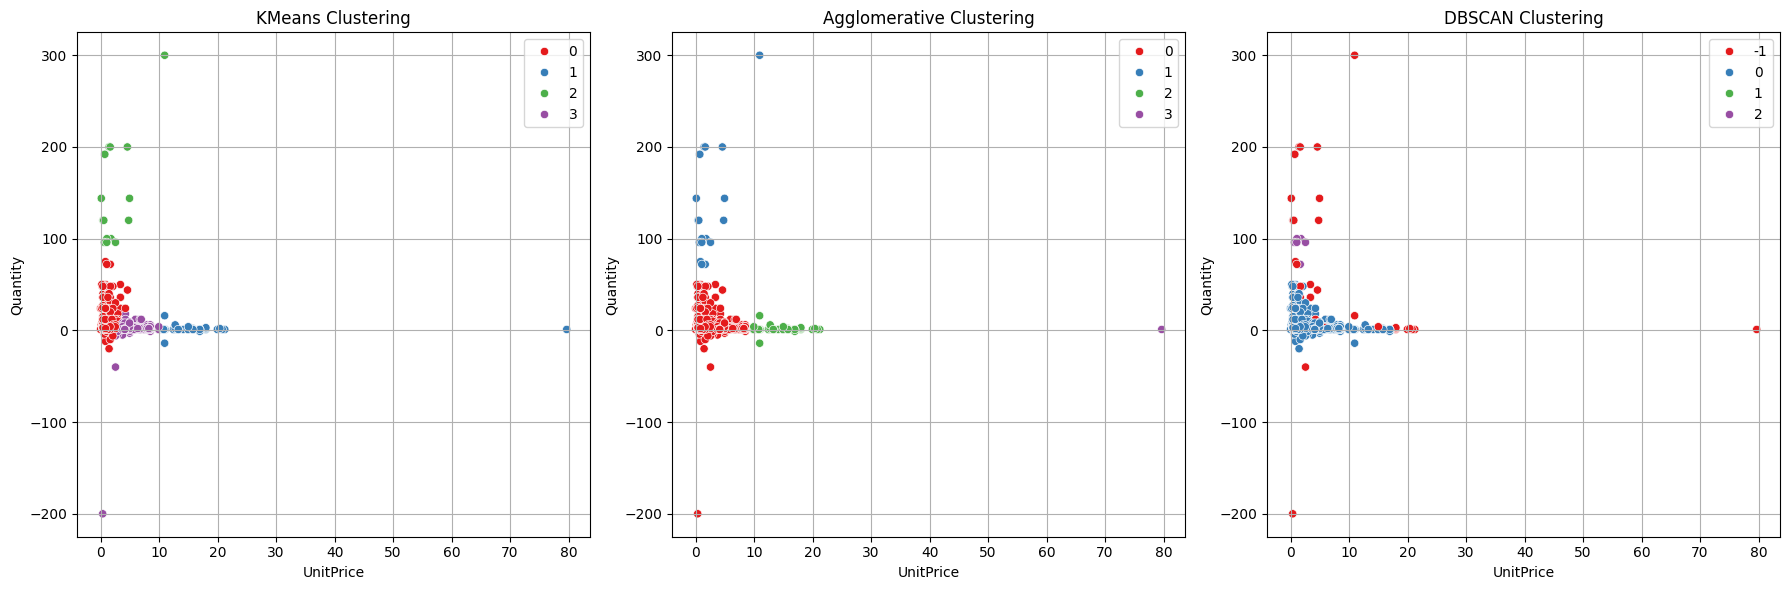

In [ ]:

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot KMeans clusters
sns.scatterplot(data=data1, x='UnitPrice', y='Quantity', hue=y_kmeans, palette='Set1', ax=axes[0])
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel('UnitPrice')
axes[0].set_ylabel('Quantity')
axes[0].grid(True)

# Plot Agglomerative Clustering clusters
sns.scatterplot(data=data1, x='UnitPrice', y='Quantity', hue=y_AC, palette='Set1', ax=axes[1])
axes[1].set_title('Agglomerative Clustering')
axes[1].set_xlabel('UnitPrice')
axes[1].set_ylabel('Quantity')
axes[1].grid(True)

# Plot DBSCAN clusters
sns.scatterplot(data=data1, x='UnitPrice', y='Quantity', hue=y_dbscan, palette='Set1', ax=axes[2])
axes[2].set_title('DBSCAN Clustering')
axes[2].set_xlabel('UnitPrice')
axes[2].set_ylabel('Quantity')
axes[2].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()